# 選挙のデータ解析（世論調査と寄付）

このレクチャーでは、2012年のアメリカ大統領選挙について扱います。その内容にあまり詳しくない方は、以下が参考になると思います。
https://ja.wikipedia.org/wiki/2012%E5%B9%B4%E3%82%A2%E3%83%A1%E3%83%AA%E3%82%AB%E5%90%88%E8%A1%86%E5%9B%BD%E5%A4%A7%E7%B5%B1%E9%A0%98%E9%81%B8%E6%8C%99

基本的には民主党のオバマ候補と、共和党のロムニー候補の争いで、オバマ候補が勝利しました。

最初は、世論調査結果のデータを扱います。以下のような問題を設定してみましょう。

    1.) どのような人達が調査対象だったか？
    2.) 調査結果は、どちらの候補の有利を示しているか？
    3.) 態度未定の人達が世論調査に与えた影響は？
    4.) また、態度未定の人たちの動向は？
    5.) 投票者の気持ちは、時間とともにどう変化したか？
    6.) 討論会の影響を世論調査の結果から読み取ることができるか？
    
2つ目のデータセットについては、後半で。

まずはいつものように、必要なものをインポートします

In [55]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

データは、HuffPost Pollsterから持ってきます。古いデータのためすでに[サイト](http://elections.huffingtonpost.com/pollster) から削除されているたので、ノートブックと同じディレクトリにcsvファイルを置いておきます。

In [56]:
# 以下のコードでpll_dfをつくります。
poll_df = pd.read_csv('2012-general-election-romney-vs-obama.csv')

# データの概要です。
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             106 non-null    ob

In [57]:
# 最初の5行を表示します。
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,NaN,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,NaN,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,NaN,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,NaN,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,NaN,NaN,1


In [70]:
# 政党色が付いている調査対象があります。

poll_df[['Pollster', 'Partisan', 'Affiliation']].sample(10)

,Pollster,Partisan,Affiliation
566,CNN,Nonpartisan,NaN
177,Rasmussen,Nonpartisan,NaN
119,FOX,Nonpartisan,NaN
506,FOX,Nonpartisan,NaN
520,Ipsos/Reuters,Nonpartisan,NaN
496,Zogby (Internet),Nonpartisan,NaN
110,Quinnipiac,Nonpartisan,NaN
316,Resurgent Republic (R),Pollster,Rep
260,Bloomberg,Nonpartisan,NaN
123,DailyKos/SEIU/PPP (D),Sponsor,Dem


<Axes: xlabel='Affiliation', ylabel='count'>

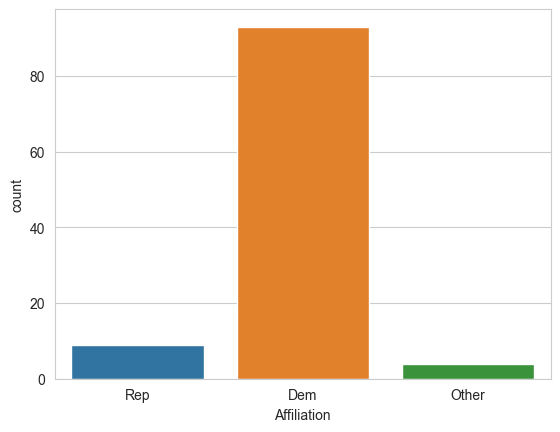

In [71]:
# affiliationで数を分類します。

sns.countplot(poll_df, x='Affiliation')

In [72]:
from collections import Counter

Counter(poll_df['Affiliation'])

Counter({nan: 480, 'Rep': 9, 'Dem': 93, 'Other': 4})

In [73]:
# 欠損値を文字列で置換

poll_df['Affiliation'] = poll_df['Affiliation'].fillna('None')

<Axes: xlabel='Affiliation', ylabel='count'>

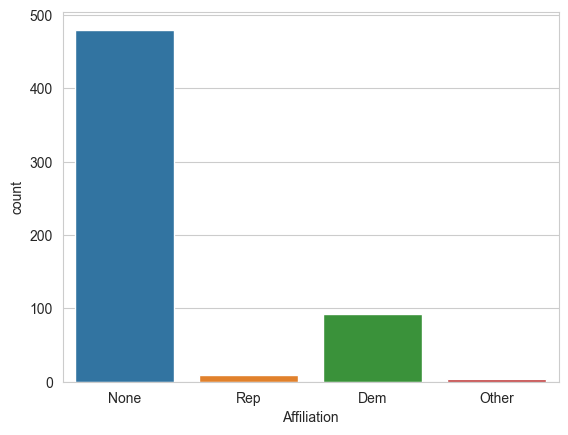

In [74]:
sns.countplot(poll_df, x='Affiliation')

<Axes: xlabel='Affiliation', ylabel='count'>

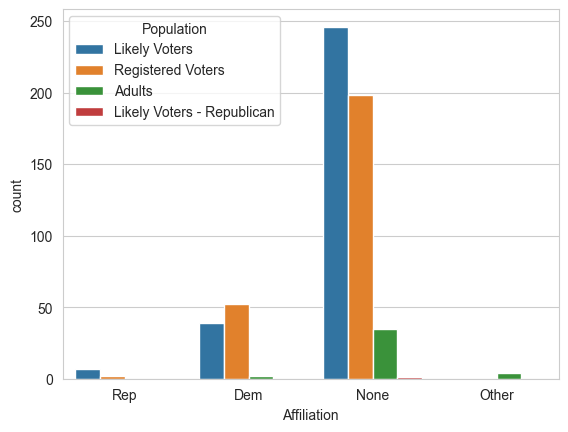

In [75]:
# 調査主体の支持政党を、調査対象で層別化します。

sns.countplot(poll_df, x='Affiliation',
              hue='Population',
              order=['Rep','Dem','None', 'Other'])

In [76]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


オバマ、ロムニー、未定の3つの選択肢について、それぞれ平均的な支持率を計算してみます。

In [77]:
poll_df[['Obama', 'Romney', 'Undecided']].mean()

Obama        46.805461
Romney       44.614334
Undecided     6.550827
dtype: float64

<Axes: >

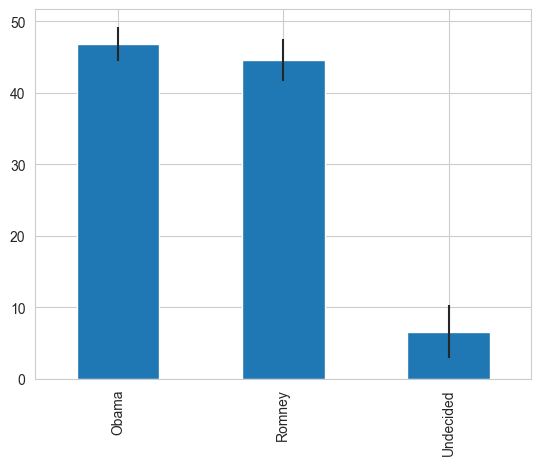

In [78]:
# matplotlibを使ってプロットします

cols = ['Obama', 'Romney', 'Undecided']
avg = poll_df[cols].mean()

# 標準偏差を計算します。
std = poll_df[cols].std()

# pandas標準のplotで描画します。エラーバーも付けておきましょう。
avg.plot(yerr=std, kind='bar', legend=False)

In [79]:
# 平均と標準偏差のSeriesを連結します。
poll_avg = pd.concat([avg, std], axis=1)

# 名前を変えておきます。
poll_avg.columns = ['Average', 'STD']

poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


ここまでLec67

In [80]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


両候補の支持率と未定の割合を、手っ取り早くプロットしてみます。

Note: 同じEnd Dateに複数のプロトがある場合があります。

<Axes: xlabel='End Date'>

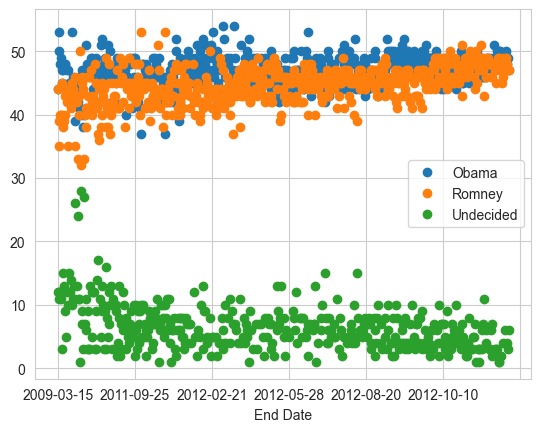

In [81]:
# 時間事に、支持率をプロットします。
poll_df.sort_values('End Date').plot(x='End Date',
                                     y=['Obama', 'Romney', 'Undecided'],
                                     marker='o',
                                     linestyle='')

時系列のデータとして解析するのがよさそうです。

オバマとロムニーの支持率の差を計算し、新しい列に保存します。

In [82]:
# Differenceは「差」を意味する英単語です。
poll_df['Difference'] = poll_df['Obama'] - poll_df['Romney']

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


In [83]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

Difference列は、「Obama - Romney」です。正の数は、オバマのリードを意味します。

これを使って、支持率の差が時間とともに、どう変化したかを計算します。同じ期間に行われた調査もあるので、groupbyを使って、データを整理しましょう。

In [84]:
# 列を限定して、Start Dateでまとめる

cols = ['Obama', 'Romney', 'Undecided', 'Difference', 'Start Date']

poll_df_mean = poll_df[cols].groupby('Start Date').mean()
poll_df_mean

,Obama,Romney,Undecided,Difference
Start Date,,,,
2009-03-13,44.00,44.00,12.000000,0.00
2009-04-17,50.00,39.00,11.000000,11.00
2009-05-14,53.00,35.00,12.000000,18.00
2009-06-12,48.00,40.00,12.000000,8.00
2009-07-15,49.00,40.00,11.000000,9.00
...,...,...,...,...
2012-10-31,48.00,46.50,4.000000,1.50
2012-11-01,49.00,47.25,2.400000,1.75
2012-11-02,49.25,48.50,2.000000,0.75


In [85]:
# indexをDateTime型に変換
poll_df_mean.index = pd.to_datetime(poll_df_mean.index)

In [86]:
poll_df_mean.loc['2009']

,Obama,Romney,Undecided,Difference
Start Date,,,,
2009-03-13,44.0,44.0,12.0,0.0
2009-04-17,50.0,39.0,11.0,11.0
2009-05-14,53.0,35.0,12.0,18.0
2009-06-12,48.0,40.0,12.0,8.0
2009-07-15,49.0,40.0,11.0,9.0
2009-07-18,45.0,45.0,3.0,0.0
2009-08-14,47.0,39.0,13.5,8.0
2009-09-21,48.0,39.0,13.0,9.0
2009-10-16,48.0,40.0,12.0,8.0


In [87]:
poll_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 357 entries, 2009-03-13 to 2012-11-04
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Obama       357 non-null    float64
 1   Romney      357 non-null    float64
 2   Undecided   296 non-null    float64
 3   Difference  357 non-null    float64
dtypes: float64(4)
memory usage: 13.9 KB


時間とともに、支持率がどう変化したかを端的に可視化出来ます。

<Axes: xlabel='Start Date'>

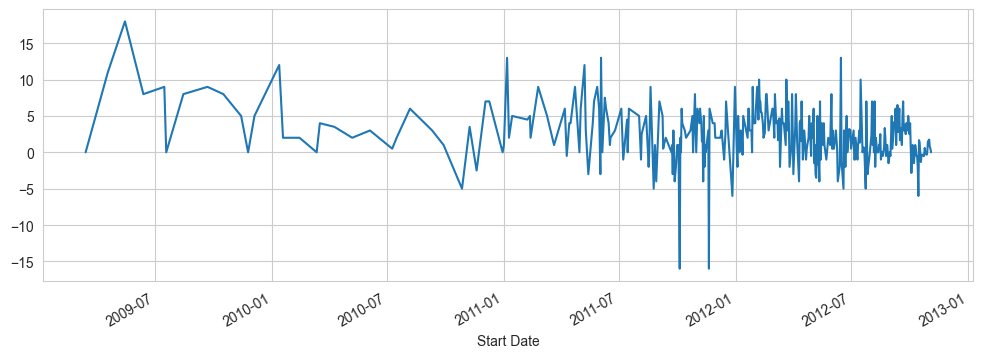

In [88]:
poll_df_mean['Difference'].plot(figsize=(12, 4))

候補者同士の討論会があった日付を、このプロットに描き込むと面白いかも知れません。

2012の討論会があったのは、10/3、10/16、10/22です。

最初のバージョンでは手作業していました。（2012年の10月が、X軸上のいくつ目のデータなのかを知る必要があります。
ここは単純に、2012/10のデータを見て、どのindexをとればいいか確認することにしましょう。）

In [89]:
poll_df_mean.loc['2012-10']

,Obama,Romney,Undecided,Difference
Start Date,,,,
2012-10-01,48.500000,46.000000,3.000000,2.500000
2012-10-02,49.000000,45.000000,6.000000,4.000000
2012-10-04,45.833333,48.666667,6.000000,-2.833333
2012-10-05,46.000000,46.500000,7.000000,-0.500000
2012-10-06,46.500000,45.500000,4.500000,1.000000
2012-10-07,47.000000,47.333333,4.666667,-0.333333
2012-10-08,46.500000,48.000000,5.000000,-1.500000
2012-10-10,48.000000,47.000000,3.500000,1.000000
2012-10-11,47.000000,46.500000,5.666667,0.500000


3日はデータが無いので、2日にします。

<Axes: xlabel='Start Date'>

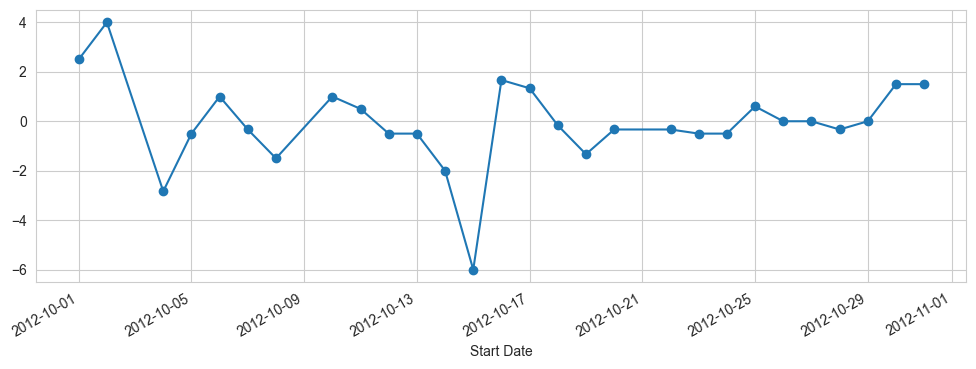

In [90]:
# まずは10月に限定したプロットです。
poll_df_mean.loc['2012-10', 'Difference'].plot(figsize=(12,4), marker='o')

In [ ]:
# エラーになる場合は、以下のコマンドでplotlyをインストールしてJupyterLabを再起動してください。
# pip install plotly

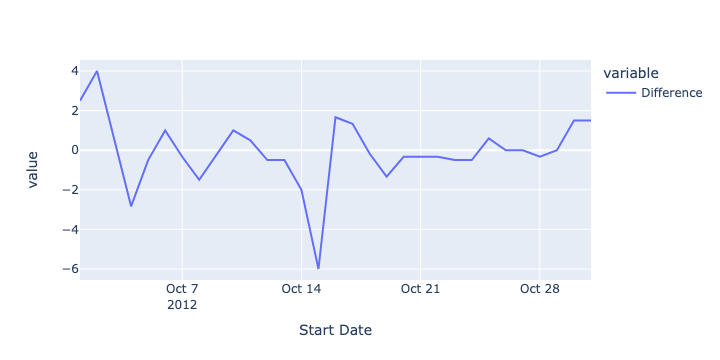

In [91]:
import plotly.express as px

# 第1回討論会は　10/3　（オバマ守勢）
# 第2回討論会は10/16

px.line(poll_df_mean.loc['2012-10', 'Difference'])

米国大統領選挙に馴染みが薄いので、データの解釈は難しいですが、このような解析が役に立つのはおわかりいただけるかと思います。

ここまでLec68

# 寄付のデータ

話題を変えて、両陣営への寄付に関するデータを分析していくことにします。

これまでで一番大きなデータセット（約150MB)になります。[ここからダウンロード出来ます](https://www.dropbox.com/s/5eoh3j9atxjo7t0/Election_Donor_Data.csv?dl=0) , Notebookが起動しているフォルダと同じ場所に保存しておきましょう。

このデータは、次の視点から分析を進めることにします。

    1.) 寄付の金額とその平均的な額
    2.) 候補者ごとの寄付の違い
    3.) 民主党と共和党での寄付の違い
    4.) 寄付した人々の属性について
    5.) 寄付の総額になんらかのパターンがあるか？
    

In [92]:
# CSV形式のデータを読み込んで、DataFrameを作ります。
donor_df = pd.read_csv('Election_Donor_Data.csv')

/var/folders/k5/g89wjxz9235346v2wbtwbqdm0000gn/T/ipykernel_46061/1629425849.py:2: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



In [93]:
# データの概要です。
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [94]:
# 最初の5行を見てみます。
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


まずは、寄付の総額と平均的な額を計算してみることにしましょう。

In [95]:
# 寄付の額をざっと眺めてみます。
donor_df['contb_receipt_amt'].value_counts()

contb_receipt_amt
 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: count, Length: 8079, dtype: int64

8079種類もあるのにはちょっと驚きです。代表値を計算してみましょう。

In [96]:
# 寄付の平均的な額
don_mean = donor_df['contb_receipt_amt'].mean()

# 標準偏差
don_std = donor_df['contb_receipt_amt'].std()

print(f'寄付の平均は{don_mean:0.2f}ドルで、その標準偏差は{don_std:0.2f}です。')

寄付の平均は298.24ドルで、その標準偏差は3749.67です。


ものすごく大きな標準偏差です。
非常に大きな値があるのでしょうか？分布の形がかなり偏っていることが予想されます。

In [97]:
# DataFrameの1列から、Seriesを作ります。
top_donor = donor_df['contb_receipt_amt'].copy()

# ソートしましょう。
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

負の数や、非常に大きな値が見えます。
負の数は、払い戻しのデータなどですので、ひとまず正の数だけに注目することにしましょう。

In [98]:
# 負の数を取り除きます。
top_donor = top_donor[top_donor > 0]

# よく寄付される額Top10をみてみましょう。
top_donor.value_counts().head(10)

contb_receipt_amt
100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: count, dtype: int64

Top10でも、10ドルから2,500ドルまで幅広いことがわかります。

寄付の額は、10や50などキリの良い数字が多いのでしょうか？
ヒストグラムを描いて、2,500ドルまでのデータを調べてみましょう。

<Axes: >

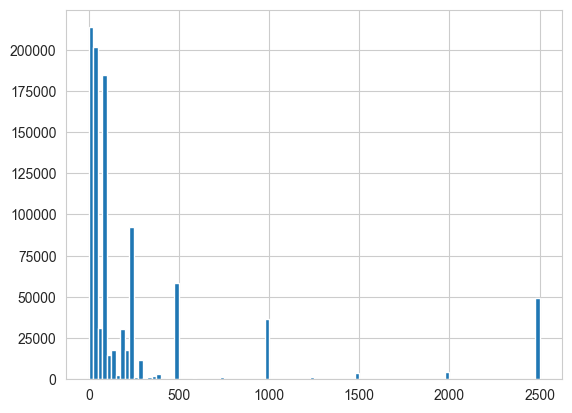

In [99]:
# 2,500ドルまでの寄付のデータを取り出します。
com_don = top_donor[top_donor <= 2500]

# binを細かくして、キリのいい数字にピークがあるか、見てみましょう。
com_don.hist(bins=100)

どうやら、我々の直感は正しかったようです。

ここまでLec69

政党ごとに寄付の額をまとめて見ることにします。
これをするには、まず候補者のデータに注目して、候補者の所属政党でデータを分類する事を試みます。

In [100]:
# 重複の無い候補者のデータを作って置きます。
candidates = donor_df['cand_nm'].unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

新たに、Party列を作ります。候補者の所属政党のデータを保持する辞書を作って、一気にDataFrameを更新しましょう。 (詳しくはLecture 36にあります）

In [101]:
# 所属政党の辞書です。
party_map = {'Bachmann, Michelle': 'Republican',
             'Cain, Herman': 'Republican',
             'Gingrich, Newt': 'Republican',
             'Huntsman, Jon': 'Republican',
             'Johnson, Gary Earl': 'Republican',
             'McCotter, Thaddeus G': 'Republican',
             'Obama, Barack': 'Democrat',
             'Paul, Ron': 'Republican',
             'Pawlenty, Timothy': 'Republican',
             'Perry, Rick': 'Republican',
             "Roemer, Charles E. 'Buddy' III": 'Republican', # 文字列が’を含むので全体は”
             'Romney, Mitt': 'Republican',
             'Santorum, Rick': 'Republican'}

# 以下のコードで、DataFrame全体を更新できます。
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [ ]:
# 以下のコードと同じことがmapだけでできます。
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

払い戻しのデータを除去しておきましょう。完成したデータは次のような感じです。

In [102]:
# 払い戻しの除去
donor_df = donor_df[donor_df['contb_receipt_amt'] > 0]

donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


候補者ごとに寄付の額をまとめてみます。
まずはじめに、寄付の件数から。

In [103]:
# 候補者の名前でグループ化したあと、それぞれの寄付件数を表示します。

donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

オバマの圧勝です。それもそのはず。彼は民主党からの唯一の候補者なので、寄付が集まっているわけです。寄付の額を見てみましょう。

In [104]:
# グループ化したあと、今度は寄付の総額を表示します。

donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

ちょっと読みにくいので、少し結果を整形することにします。

In [105]:
# データの準備です。
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()


for i in cand_amount.index:
    print(f"{i}は、{cand_amount.loc[i]:,}ドル集めました。\n")

Bachmann, Michelleは、2,711,439.29ドル集めました。

Cain, Hermanは、7,101,081.89ドル集めました。

Gingrich, Newtは、12,832,769.69ドル集めました。

Huntsman, Jonは、3,330,373.48ドル集めました。

Johnson, Gary Earlは、566,961.6ドル集めました。

McCotter, Thaddeus Gは、39,030.0ドル集めました。

Obama, Barackは、135,877,427.24ドル集めました。

Paul, Ronは、21,009,619.83ドル集めました。

Pawlenty, Timothyは、6,004,819.48ドル集めました。

Perry, Rickは、20,305,754.0ドル集めました。

Roemer, Charles E. 'Buddy' IIIは、373,009.9ドル集めました。

Romney, Mittは、88,335,907.53ドル集めました。

Santorum, Rickは、11,043,159.31ドル集めました。



文字での表示より、やはりグラフ表示がいいかもしれません。

<Axes: xlabel='cand_nm'>

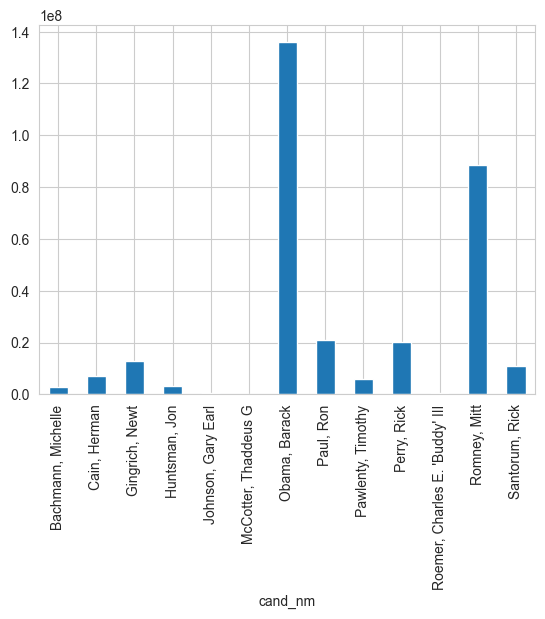

In [106]:
# 棒グラフを描いてみましょう。
cand_amount.plot(kind='bar')

比較が簡単になりました。
オバマ候補だけで100億円以上のお金が寄付で集まっているのがわかります。
今度は、政党別で比較してみましょう。

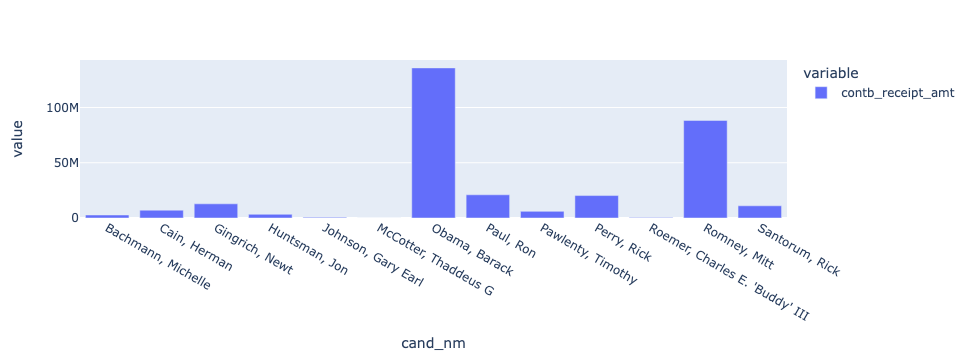

In [107]:
px.bar(cand_amount)

<Axes: xlabel='Party'>

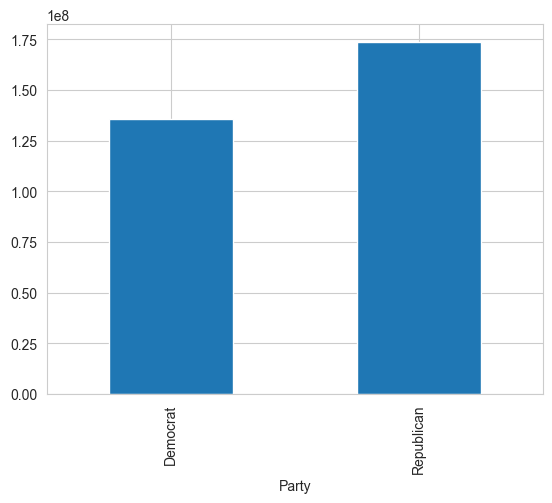

In [108]:
# 政党ごとの寄付の額です。

donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

民主党（Democrat）はオバマ候補1人ですので、政党の比較では、共和党優勢ですが、共和党候補者達は、この額をみんなで分けているので、個人でみると厳しい情勢です。

最後に、寄付した人達の職業をまとめてみましょう。
まず、職業のデータを元のDataFrameから抜き出して、これをもとに、ピボットテーブルを作ります。このとき、職業ごとに民主党と共和党への寄付額が分かるようにします。
最後にこれらのデータをまとめて、寄付者の属性ごとの寄付額を算出してみましょう。

In [109]:
# 職業ごとに、政党別に分けて寄付額をまとめます。
occupation_df = donor_df.pivot_table(values='contb_receipt_amt',
                                     index='contbr_occupation',
                                     columns='Party',
                                     aggfunc='sum')

In [110]:
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


DataFrameのサイズを見ておきましょう。

In [111]:
occupation_df.shape

(45067, 2)

4万5千以上の職種があるようで、簡単には描画できそうにありません。
閾値を決めて、寄付の総額が小さい職種については、表示を省略するようにしてみます。

In [112]:
# 百万ドル（約1億2千万）をひとつの区切りにしてみます。
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [113]:
# サイズを見てみましょう。
occupation_df.shape

(31, 2)

これなら、グラフにできそうです。

<Axes: xlabel='contbr_occupation'>

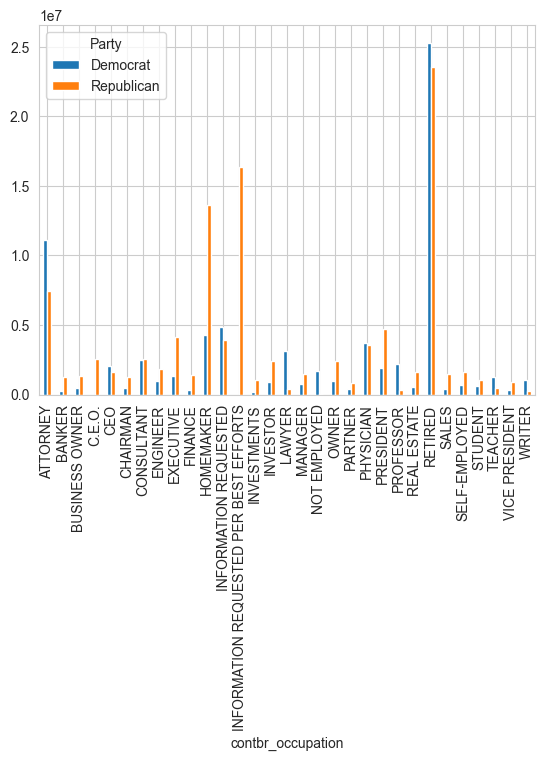

In [114]:
# pandasの機能を使って、棒グラフを描いてみます。
occupation_df.plot(kind='bar')

kind = 'barh' (horizontal)とすると、横向きになります。

<Axes: ylabel='contbr_occupation'>

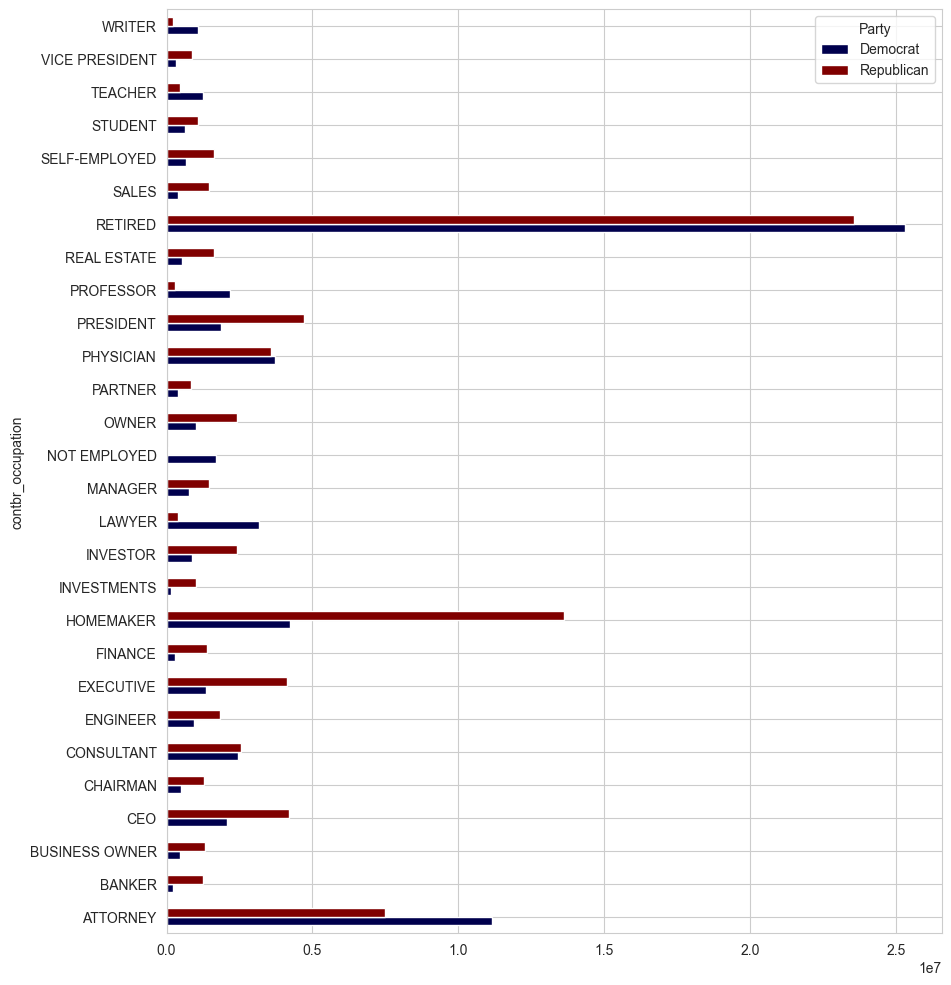

In [120]:
# 横向き（水平：Horizontal）な図が描けました。

occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')

In [116]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41
CHAIRMAN,496547.00,1296092.75
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09


色々と粗が目立ちます。ひとまず、「Information Requested」を取り除いて、「CEO」と「C.E.O.」を1つにまとめてみます。

In [117]:
# 無効な回答を取り除きます。
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

CEOとC.E.Oをまとめましょう。

In [118]:
# CEOにまとめます。
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# C.E.O.を消しましょう。
occupation_df.drop('C.E.O.',inplace=True)

再び、プロットします。

<Axes: ylabel='contbr_occupation'>

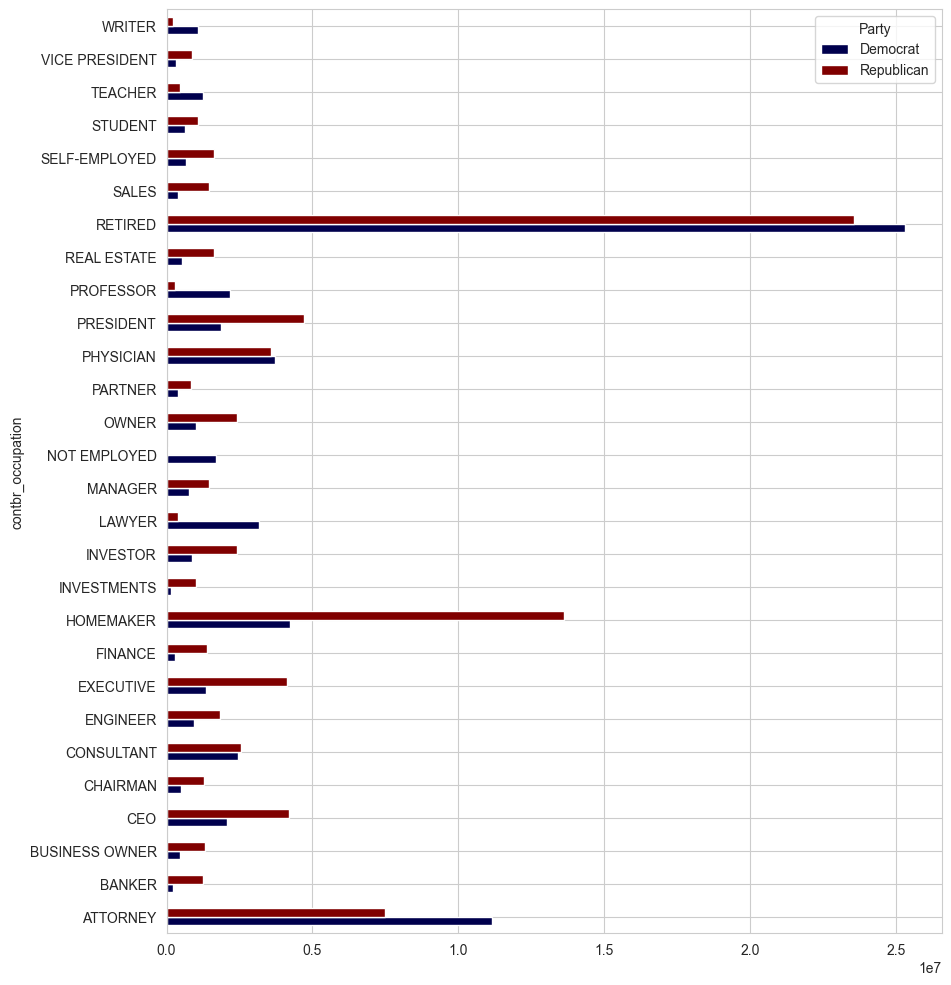

In [119]:
occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')

CEO（企業経営者）は、保守的な思想の持ち主のように見えます。両党の税に対する考え方が反映されているのかも知れません。

### お疲れ様でした
選挙に関するデータを一通り解析しました。大きなデータセットなので、工夫次第でまだまだやれることがあると思いますので、是非チャレンジしてみてください。